In [1]:
from run_sim import run_sim
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# set up dataframe for collecting event data
mtd_stats, attack_stats = run_sim()

Target Node is:  93


Adversary: Start SCAN_HOST at 0.0s.
Adversary: Processed SCAN_HOST at 5.0s.
Adversary: Start ENUM_HOST at 5.0s.
Adversary: Processed ENUM_HOST at 7.0s.
Adversary: Start SCAN_PORT at 7.0s.
Adversary: Processed SCAN_PORT at 17.0s.
Adversary: Start EXPLOIT_VULN at 17.0s.
Adversary: Processed EXPLOIT_VULN at 38.0s.
Adversary: Start BRUTE_FORCE at 38.0s.
Adversary: Processed BRUTE_FORCE at 58.0s.
Adversary: Start ENUM_HOST at 58.0s.
Adversary: Processed ENUM_HOST at 60.0s.
Adversary: Start SCAN_PORT at 60.0s.
MTD: serviceDiversity triggered 60.2s
MTD: serviceDiversity deployed in the network at 60.2s.
Adversary: Processed SCAN_PORT at 70.0s.
Adversary: Start EXPLOIT_VULN at 70.0s.
Adversary: Processed EXPLOIT_VULN at 90.5s.
Adversary: Start BRUTE_FORCE at 90.5s.
MTD: serviceDiversity finished in 40.4s at 100.6s.
MTD: Interrupted BRUTE_FORCE at 100.6s!
Adversary: Restarting with SCAN_PORT at 102.6s!
Adversary: Start SCAN_PORT at 102.6s.
Adversary: Processed SCAN_PORT at 112.6s.
Adversary: St

In [3]:
print(mtd_stats.dict())
mtd_operation_record = pd.DataFrame(mtd_stats.mtd_operation_record)

mtd_operation_record

{'Total suspended MTD': 213, 'Total triggered MTD': 547, 'Total executed MTD': 333, 'Total attack interrupted': 270}


,name,start_time,finish_time,duration
0,serviceDiversity,60.161602,100.573787,40.412185
1,osdiversity,120.509437,150.747676,30.238239
2,osdiversity,181.414761,211.651678,30.236917
3,serviceDiversity,241.808717,281.840851,40.032134
4,serviceDiversity,301.909323,342.011709,40.102386
...,...,...,...,...
328,CompleteTopologyShuffle,15748.088047,15819.955392,71.867345
329,HostTopologyShuffle,15826.841408,15866.860998,40.019591
330,serviceDiversity,15841.951889,15881.955653,40.003765
331,IPShuffle,15874.439893,15924.476295,50.036402


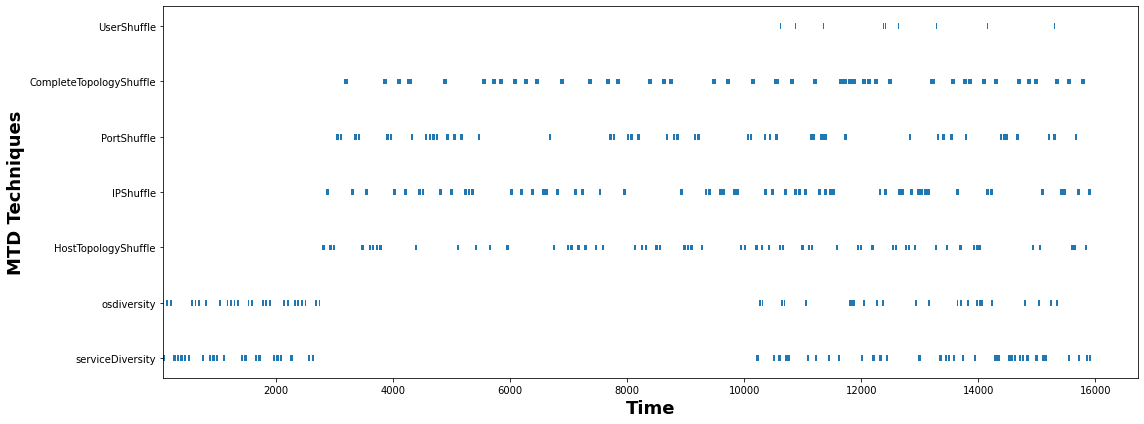

In [4]:
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.barh(mtd_operation_record['name'], mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.1)

plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('MTD Techniques', weight='bold', fontsize=18)
fig.tight_layout()
plt.show()

In [5]:
attack_operation_record = pd.DataFrame(attack_stats.attack_operation_record)
attack_operation_record

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
0,SCAN_HOST,0.000000,5.000000,5.000000,-1,0,0,0,,[],,
1,ENUM_HOST,5.000000,7.000000,2.000000,-1,0,0,0,,[],,
2,SCAN_PORT,7.000000,17.000000,10.000000,0,1,0,0,,[],,
3,EXPLOIT_VULN,17.000000,38.027138,21.027138,0,1,0,0,,[],,
4,BRUTE_FORCE,38.027138,58.027138,20.000000,0,1,6,0,,[],,
...,...,...,...,...,...,...,...,...,...,...,...,...
2138,SCAN_PORT,15933.476295,15943.476295,10.000000,19,2,825,199,,[],,
2139,EXPLOIT_VULN,15943.476295,15966.554482,23.078188,19,2,825,199,19,[],,
2140,SCAN_NEIGHBOR,15966.554482,15971.554482,5.000000,19,2,825,200,,[],,
2141,ENUM_HOST,15971.554482,15973.554482,2.000000,19,2,825,200,,[],,


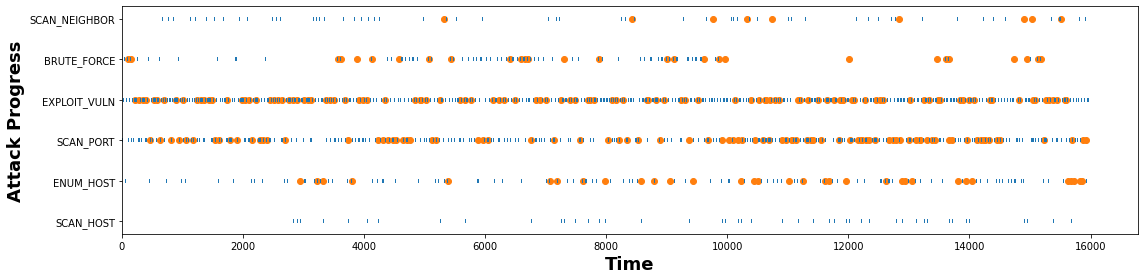

In [6]:
fig2, ax2 = plt.subplots(1, figsize=(16, 4))
ax2.barh(attack_operation_record['name'], attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.1)
interrupted_record = attack_operation_record[attack_operation_record['interrupted_by'] != '']
ax2.scatter( interrupted_record['finish_time'], interrupted_record['name'])
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Attack Progress', weight='bold', fontsize=18)
fig2.tight_layout()
plt.show()

In [7]:
attack_operation_record[(attack_operation_record['name'] == 'SCAN_PORT') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
186,SCAN_PORT,1787.330331,1797.330331,10.0,32,1,407,25,32,"[Dotty, Lorine]",,
246,SCAN_PORT,2252.943255,2262.943255,10.0,40,1,472,33,40,"[Ernestine, Marjory]",,
342,SCAN_PORT,3015.756732,3025.756732,10.0,48,6,525,45,48,[],,
395,SCAN_PORT,3333.088455,3343.088455,10.0,71,1,565,51,71,"[Janeva, Sharron]",,
419,SCAN_PORT,3504.333793,3514.333793,10.0,51,6,571,54,51,[],,
501,SCAN_PORT,4059.576801,4069.576801,10.0,95,1,599,61,95,"[Adelina, Lissi]",,
532,SCAN_PORT,4240.566734,4250.566734,10.0,81,1,623,64,81,[Hildy],,
655,SCAN_PORT,5307.510229,5317.510229,10.0,134,1,650,71,134,"[Ameline, Myrtia]",,
726,SCAN_PORT,5943.428905,5953.428905,10.0,79,1,652,75,79,[Sibbie],,
752,SCAN_PORT,6132.048049,6142.048049,10.0,65,4,652,76,65,[],,


In [8]:
attack_operation_record[(attack_operation_record['name'] == 'EXPLOIT_VULN') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
13,EXPLOIT_VULN,162.747676,182.796884,20.049208,1,1,26,0,1,"[Emelina, Elita, Jenifer, Regina, Fancie]",,
25,EXPLOIT_VULN,293.840851,314.094417,20.253566,2,1,39,1,2,"[Lynnea, Kirstyn, Bonnibelle]",,
31,EXPLOIT_VULN,354.011709,377.128699,23.116990,27,1,53,2,27,"[Odelia, Junia, Jennifer, Rheba, Dulci]",,
43,EXPLOIT_VULN,475.305873,495.355545,20.049672,3,1,109,3,3,"[Aline, Waneta, Gayle, Eydie]",,
49,EXPLOIT_VULN,535.564194,556.113544,20.549350,46,1,144,4,46,"[Dyane, Mercedes, Monica, Molli, Constancia]",,
...,...,...,...,...,...,...,...,...,...,...,...,...
2112,EXPLOIT_VULN,15753.894766,15774.691110,20.796344,15,1,822,195,15,[],,
2117,EXPLOIT_VULN,15793.691110,15814.721397,21.030287,16,1,822,196,16,[],,
2123,EXPLOIT_VULN,15838.955392,15859.170597,20.215205,17,1,822,197,17,[],,
2131,EXPLOIT_VULN,15893.955653,15914.291148,20.335495,18,1,822,198,18,[],,


In [9]:
attack_operation_record[(attack_operation_record['name'] == 'BRUTE_FORCE') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
915,BRUTE_FORCE,7528.066166,7548.066166,20.0,63,2,658,81,63,[Aaren],,


In [10]:
if not os.path.exists('data_analysis'):
    os.makedirs(os.path.dirname('data_analysis'))

attack_operation_record.to_csv('data_analysis/attack_operation_record.csv',index=False)
mtd_operation_record.to_csv('data_analysis/mtd_operation_record.csv', index=False)

In [11]:
attack_operation_record = pd.read_csv('data_analysis/attack_operation_record.csv')